In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets

In [2]:
from sklearn import model_selection
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [3]:
dataset = datasets.load_boston()

In [4]:
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['target'] = dataset.target
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [5]:
df.shape

(506, 14)

In [6]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
df.iloc[:,-1].value_counts()
# -1 : 맨 뒤의 요소부터 읽어드려라

50.0    16
25.0     8
23.1     7
21.7     7
22.0     7
        ..
12.8     1
29.9     1
9.6      1
36.1     1
13.0     1
Name: target, Length: 229, dtype: int64

In [8]:
x_data = dataset.data
y_data = dataset.target
x_data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [9]:
y_data

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [10]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x_data, y_data, test_size=0.3)

In [11]:
x_train

array([[5.20580e-01, 0.00000e+00, 6.20000e+00, ..., 1.74000e+01,
        3.88450e+02, 9.54000e+00],
       [1.12658e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        3.43280e+02, 1.21200e+01],
       [2.98500e-02, 0.00000e+00, 2.18000e+00, ..., 1.87000e+01,
        3.94120e+02, 5.21000e+00],
       ...,
       [6.44405e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        9.79500e+01, 1.20300e+01],
       [9.25200e-02, 3.00000e+01, 4.93000e+00, ..., 1.66000e+01,
        3.83780e+02, 7.37000e+00],
       [2.29690e-01, 0.00000e+00, 1.05900e+01, ..., 1.86000e+01,
        3.94870e+02, 1.09700e+01]])

In [12]:
y_train

array([25.1, 15.3, 28.7, 22. , 10.2, 19.9, 21.9, 14.3, 15.6, 16.8, 17.2,
       24.3, 21.9, 33.1, 21.5, 20.2, 19.6, 30.1, 19.3, 20. , 16.1, 11. ,
       12.7, 24.7, 26.4, 41.3, 36.5, 17.9, 22.6, 18.9, 21.5, 27.5, 24.3,
       14.3, 50. , 34.9, 22.6, 15.1,  7.5, 16.2, 20.3, 44. , 22.2, 32.4,
       37.2,  7.2, 19.6, 27.5, 25. , 37.3, 22. , 33.2, 24.2, 33.1, 16.6,
       17.3, 29.4, 13.1, 15.2, 23.1, 28.2, 13.8, 33.4, 21. , 11.8, 19.2,
       22.6, 17.8, 19.9, 29. , 24.1, 13.5, 14.1, 21.1, 11.9, 22.9, 39.8,
       20.1, 20.6, 24.6, 18.4, 22.5, 29.6, 23.1, 22.5, 50. , 19.6, 19.7,
       23.6, 15.6, 16.5, 21.7, 13.6, 50. , 18.7, 22. , 18. , 27.9, 21.2,
       23.9, 34.7, 23.1, 16.5, 23.2, 20.8, 20.3,  8.8, 23.3, 26.5, 26.6,
        9.7, 19.3, 16. , 13.1, 20.8, 16.7, 31. , 18.8, 18.1, 24.5, 17.6,
       44.8, 18.3, 29.8, 23.1, 22.2, 19.1, 17.4, 28.7, 18.4, 36.2, 28.5,
       17.2, 18.5, 20.3, 24.4, 23.3, 21.9, 10.4,  8.1, 33.8, 24.3, 17. ,
        5. , 14.9, 13.8, 32.9, 32.2, 37.6, 19.3, 31

In [13]:
lm = LinearRegression()

In [14]:
lm.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
lm.coef_

array([-1.16040959e-01,  6.00347517e-02,  4.68999499e-02,  2.15470109e+00,
       -2.14283070e+01,  3.50592370e+00, -4.25731546e-03, -1.59874356e+00,
        3.38640170e-01, -1.39072457e-02, -1.10770334e+00,  8.72959846e-03,
       -4.43892558e-01])

In [17]:
lm.intercept_

43.32286783167232

In [18]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [19]:
y_predict = lm.predict(x_test)

In [20]:
score = metrics.r2_score(y_test, y_predict)
score

0.7201352529947913

In [21]:
y_predict = lm.predict(x_train)
score = metrics.r2_score(y_train, y_predict)
score

0.7421785729781378

In [22]:
#train data의 rmse가 test data보다 큰 이유는 train data를 0.7만큼 사용하였기 때문


In [28]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1)
ridge.fit(x_train, y_train)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [25]:
train_score = ridge.score(x_train, y_train)
train_score

0.7382564753947216

In [26]:
test_score = ridge.score(x_test, y_test)
test_score

0.7248878860374022

In [30]:
ridge10 = Ridge(alpha=10).fit(x_train, y_train)

In [31]:
train_score = ridge10.score(x_train, y_train)
train_score

0.7267626538334458

In [32]:
test_score = ridge10.score(x_test, y_test)
test_score

0.7217596602175982

In [33]:
ridge01 = Ridge(alpha=0.1).fit(x_train, y_train)

In [34]:
train_score = ridge01.score(x_train, y_train)
train_score

0.7420639495461123

In [35]:
test_score = ridge01.score(x_test, y_test)
test_score

0.7213995510508917

In [36]:
# x에 넣은 값들은 필드의 값들임



C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47785 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47197 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53356 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44592 missing from c

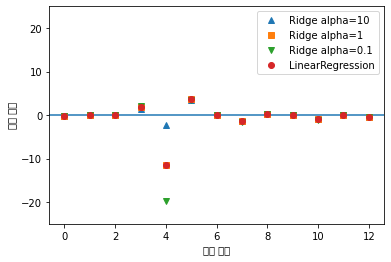

In [41]:
import matplotlib.pyplot as plt
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")
plt.plot(ridge.coef_, 'o', label="LinearRegression")
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
xlims = plt.xlim()
plt.hlines(0,xlims[0],xlims[1])
plt.xlim(xlims)
plt.ylim(-25,25)
plt.legend()

In [45]:
from pandas import DataFrame
import matplotlib.pyplot as plt

from pandas import DataFrame 
Stock_Market={'Year': [2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,
2017,2017,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016],
'Month': [12, 11,10,9,8,7,6,5,4,3,2,1,12,11,10,9,8,7,6,5,4,3,2,1],
'Interest_Rate': [2.75,2.5,2.5,2.5,2.5,2.5,2.5,2.25,2.25,2.25,2,2,2,
1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75],
'Unemployment_Rate': [5.3,5.3,5.3,5.3,5.4,5.6,5.5,5.5,5.5,5.6,
5.7,5.9,6,5.9,5.8,6.1,6.2,6.1,6.1,6.1,5.9,6.2,6.2,6.1],
'Stock_Index_Price': [1464,1394,1357,1293,1256,1254,1234,1195,1159,
1167,1130,1075,1047,965,943,958,971,949,884,866,876,822,704,719] } 

df = DataFrame(Stock_Market,columns=['Year','Month','Interest_Rate','Unemployment_Rate','Stock_Index_Price'])
print(df)

    Year  Month  Interest_Rate  Unemployment_Rate  Stock_Index_Price
0   2017     12           2.75                5.3               1464
1   2017     11           2.50                5.3               1394
2   2017     10           2.50                5.3               1357
3   2017      9           2.50                5.3               1293
4   2017      8           2.50                5.4               1256
5   2017      7           2.50                5.6               1254
6   2017      6           2.50                5.5               1234
7   2017      5           2.25                5.5               1195
8   2017      4           2.25                5.5               1159
9   2017      3           2.25                5.6               1167
10  2017      2           2.00                5.7               1130
11  2017      1           2.00                5.9               1075
12  2016     12           2.00                6.0               1047
13  2016     11           1.75    

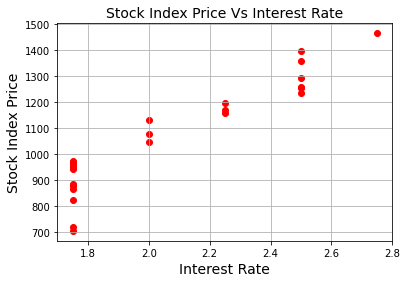

In [46]:
plt.scatter(df['Interest_Rate'], df['Stock_Index_Price'], color='red')
plt.title('Stock Index Price Vs Interest Rate', fontsize=14)
plt.xlabel('Interest Rate', fontsize=14)
plt.ylabel('Stock Index Price', fontsize=14)
plt.grid(True)
plt.show()

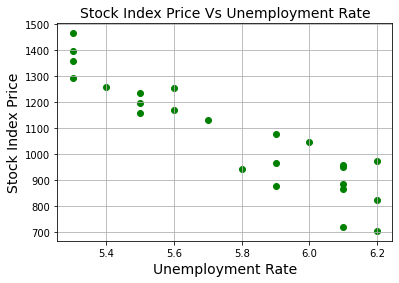

In [47]:
plt.scatter(df['Unemployment_Rate'], df['Stock_Index_Price'], color='green')
plt.title('Stock Index Price Vs Unemployment Rate', fontsize=14)
plt.xlabel('Unemployment Rate', fontsize=14)
plt.ylabel('Stock Index Price', fontsize=14)
plt.grid(True)
plt.show()

In [48]:
df.corr()

,Year,Month,Interest_Rate,Unemployment_Rate,Stock_Index_Price
Year,1.000000,0.000000,0.882851,-0.877000,0.863232
Month,0.000000,1.000000,0.339526,-0.351189,0.481287
Interest_Rate,0.882851,0.339526,1.000000,-0.925814,0.935793
Unemployment_Rate,-0.877000,-0.351189,-0.925814,1.000000,-0.922338
Stock_Index_Price,0.863232,0.481287,0.935793,-0.922338,1.000000


In [49]:
X = df[['Interest_Rate', 'Unemployment_Rate']]
Y = df[['Stock_Index_Price']]
lm = LinearRegression()
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [50]:
lm.coef_

array([[ 345.54008701, -250.14657137]])

In [52]:
lm.intercept_

array([1798.40397763])

In [53]:
lm.predict([[0.5, 3.1]])

array([[1195.71964989]])

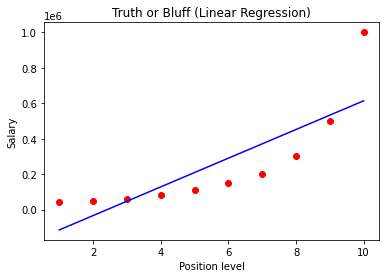

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('http://s3.us-west-2.amazonaws.com/public.gamelab.fun/dataset/position_salaries.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

def viz_linear():
    plt.scatter(X, y, color='red')
    plt.plot(X, lin_reg.predict(X), color='blue')
    plt.title('Truth or Bluff (Linear Regression)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    return
viz_linear()

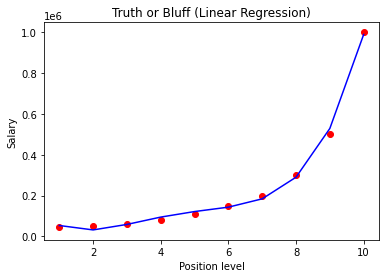

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

def viz_polymonial():
    plt.scatter(X, y, color='red')
    plt.plot(X, pol_reg.predict(poly_reg.fit_transform(X)), color='blue')
             
    plt.title('Truth or Bluff (Linear Regression)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    return
viz_polymonial()